# Pyspark Regression Implementation of Financial Fraud Dataset

In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()
#do imports and create the spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('fraud').getOrCreate()
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
dataset = spark.read.csv('/Users/16786/Desktop/creditcard.csv',header=True, inferSchema=True)

In [2]:
dataset.show()

+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|                V3|                 V4|                 V5|                 V6|                  V7|                 V8|                V9|                V10|               V11|               V12|                V13|                V14|                V15|                V16|                 V17|                V18|                V19|                V20|                 V

In [8]:
dataset.printSchema()

root
 |-- Time: decimal(10,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double

In [9]:
features = dataset.columns[:30]

In [10]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [11]:
print(features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [12]:
#create a new feature which contain the data in each of the feature condenced into one feature
assembler = VectorAssembler(inputCols=features,outputCol='features')
#do a transformation of RDD dataset using the assemble format
output_data=assembler.transform(dataset)

In [14]:
output_data.printSchema()

root
 |-- Time: decimal(10,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double

In [15]:
from pyspark.ml.feature import StandardScaler

In [16]:
output_data.head(1)

[Row(Time=Decimal('0'), V1=-1.3598071336738, V2=-0.0727811733098497, V3=2.53634673796914, V4=1.37815522427443, V5=-0.338320769942518, V6=0.462387777762292, V7=0.239598554061257, V8=0.0986979012610507, V9=0.363786969611213, V10=0.0907941719789316, V11=-0.551599533260813, V12=-0.617800855762348, V13=-0.991389847235408, V14=-0.311169353699879, V15=1.46817697209427, V16=-0.470400525259478, V17=0.207971241929242, V18=0.0257905801985591, V19=0.403992960255733, V20=0.251412098239705, V21=-0.018306777944153, V22=0.277837575558899, V23=-0.110473910188767, V24=0.0669280749146731, V25=0.128539358273528, V26=-0.189114843888824, V27=0.133558376740387, V28=-0.0210530534538215, Amount=149.62, Class=0, features=DenseVector([0.0, -1.3598, -0.0728, 2.5363, 1.3782, -0.3383, 0.4624, 0.2396, 0.0987, 0.3638, 0.0908, -0.5516, -0.6178, -0.9914, -0.3112, 1.4682, -0.4704, 0.208, 0.0258, 0.404, 0.2514, -0.0183, 0.2778, -0.1105, 0.0669, 0.1285, -0.1891, 0.1336, -0.0211, 149.62]))]

In [17]:
#only the condenced feature column and Class feature and put into a new RDD
fn = output_data.select('features','Class')

In [18]:
train,test=fn.randomSplit([.7,.3])

In [19]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

In [25]:
resultsaccuracy = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
resultsf1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [27]:
for i in range(0, 9):
    #create the model
    model = LogisticRegression(labelCol='Class')
    model.setMaxIter(i*4+4)
    #fit the model
    model=model.fit(train)
    #import the evaluator
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    #calculate the accuracy and f1 of the model
    predictions = model.transform(test)
    #create an instance of multiclassClassificationEvaluator wit the correct parameters
    evaluator = MulticlassClassificationEvaluator(
        labelCol="Class", predictionCol="prediction", metricName="accuracy")
    resultsaccuracy[i] = evaluator.evaluate(predictions)
    
    evaluator = MulticlassClassificationEvaluator(
        labelCol="Class", predictionCol="prediction", metricName="f1")
    resultsf1[i] = evaluator.evaluate(predictions)
    size = (i*2+4)
    print("itterations= %g" % size)
    print("accuracy = %g" % (resultsaccuracy[i]))
    print("f1 score = %g " % (resultsf1[i]))

itterations= 4
accuracy = 0.999076
f1 score = 0.998979 
itterations= 6
accuracy = 0.999204
f1 score = 0.99913 
itterations= 8
accuracy = 0.999193
f1 score = 0.999116 
itterations= 10
accuracy = 0.999216
f1 score = 0.999145 
itterations= 12
accuracy = 0.999193
f1 score = 0.99912 
itterations= 14
accuracy = 0.999181
f1 score = 0.999109 
itterations= 16
accuracy = 0.999193
f1 score = 0.999123 
itterations= 18
accuracy = 0.999193
f1 score = 0.999123 
itterations= 20
accuracy = 0.999193
f1 score = 0.999123 


In [138]:
summary=model.summary
summary.predictions.describe().show()

+-------+--------------------+--------------------+
|summary|               Class|          prediction|
+-------+--------------------+--------------------+
|  count|              199352|              199352|
|   mean|0.001740639672539...|0.001198884385408...|
| stddev| 0.04168475215715147|0.034604234832839253|
|    min|                 0.0|                 0.0|
|    max|                 1.0|                 1.0|
+-------+--------------------+--------------------+



In [139]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions=model.evaluate(test)
predictions.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[2.0,-1.158233093...|    0|[8.71540492135088...|[0.99983598766952...|       0.0|
|[2.0,-0.425965884...|    0|[8.66289386210811...|[0.99982714660153...|       0.0|
|[4.0,1.2296576345...|    0|[7.64094878157970...|[0.99951985817968...|       0.0|
|[10.0,0.384978215...|    0|[8.33882626306675...|[0.99976100436917...|       0.0|
|[10.0,1.249998742...|    0|[10.4929658533699...|[0.99997226994136...|       0.0|
|[13.0,-0.43690507...|    0|[8.78259543570534...|[0.99984664404009...|       0.0|
|[15.0,1.492935976...|    0|[10.4075919870344...|[0.99996979859733...|       0.0|
|[17.0,0.962496069...|    0|[7.41467028341497...|[0.99939801164279...|       0.0|
|[18.0,0.247491127...|    0|[7.08356561774025...|[0.99916192590556...|       0.0|
|[25.0,1.1140085

In [140]:
from pyspark.mllib.util import MLUtils
print("Area under ROC curve = %s" % predictions.areaUnderROC)
print("accuracy %s" % evaluator.evaluate(predictions.predictions))

Area under ROC curve = 0.9668710463663959
accuracy 0.9993563864022


In [141]:
model.summary.roc.select('FPR').collect()
model.summary.roc.select('TPR').collect()

[Row(TPR=0.0),
 Row(TPR=0.8760806916426513),
 Row(TPR=0.8904899135446686),
 Row(TPR=0.8962536023054755),
 Row(TPR=0.9048991354466859),
 Row(TPR=0.9164265129682997),
 Row(TPR=0.9279538904899135),
 Row(TPR=0.9365994236311239),
 Row(TPR=0.9394812680115274),
 Row(TPR=0.9394812680115274),
 Row(TPR=0.9452449567723343),
 Row(TPR=0.9452449567723343),
 Row(TPR=0.9481268011527377),
 Row(TPR=0.9510086455331412),
 Row(TPR=0.9567723342939481),
 Row(TPR=0.9596541786743515),
 Row(TPR=0.9596541786743515),
 Row(TPR=0.9596541786743515),
 Row(TPR=0.9596541786743515),
 Row(TPR=0.962536023054755),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9654178674351584),
 Row(TPR=0.9711815561959655),
 Row(TPR=0.9711815561959655),
 Row(TPR=0.9740634005763689),
 Row(TPR=0.974063400576368

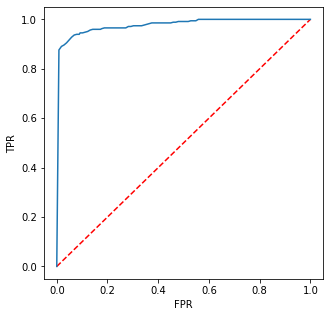

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(model.summary.roc.select('FPR').collect(),
         model.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [143]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictions = model.transform(test)
evaluator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="f1")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print("accuracy = %g " % (accuracy))


Test Error = 0.000684873
accuracy = 0.999315 


In [32]:
kmeans5 = KMeans(featuresCol='scaledFeatures',k=5)
kmeans = kmeans5.fit(cluster_fn)